### Convolutional Layer

In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

IS_COLAB = "google.colab" in sys.modules

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU detected. CNN would be very slow")
    if IS_COLAB:
        print("Change RUNTIME to GPU")

import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

2022-11-26 09:57:49.496566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


No GPU detected. CNN would be very slow


In [12]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

# 샘플 이미지를 로드합니다.
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print('shape of image:', images.shape)
print('- batch_size:', batch_size)
print('- image size:', width, 'x', height)
print('- channels:', channels)

shape of image: (2, 427, 640, 3)
- batch_size: 2
- image size: 640 x 427
- channels: 3


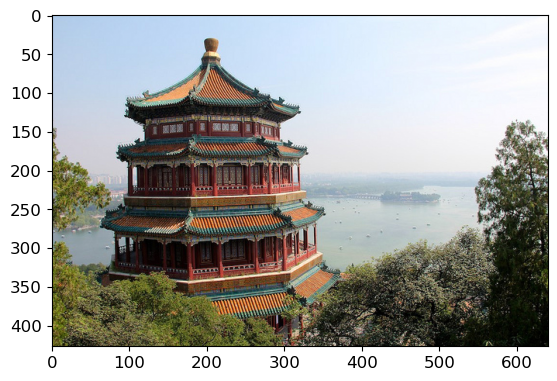

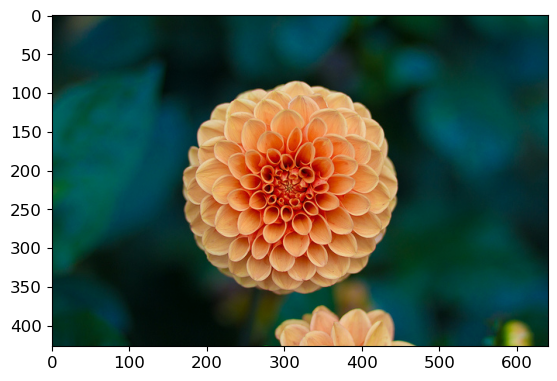

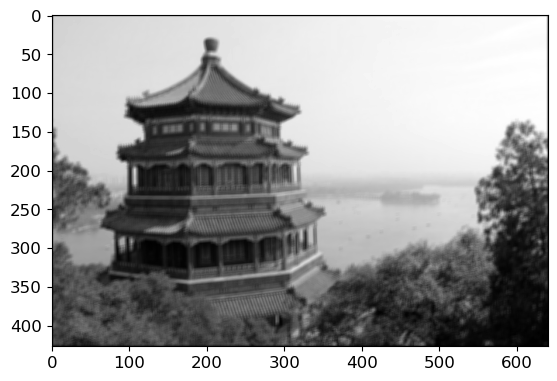

line---


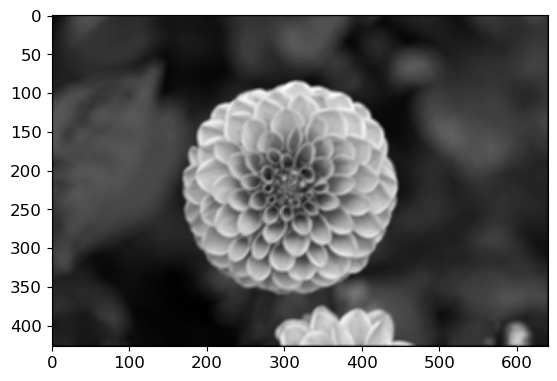

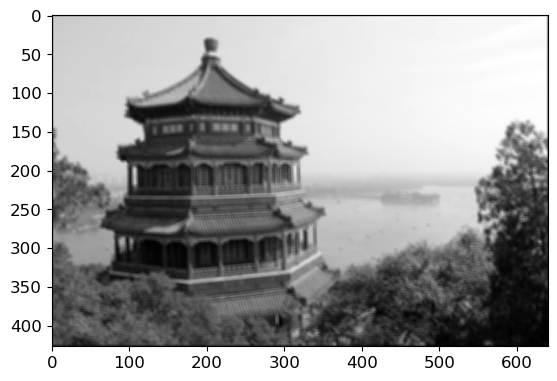

line---


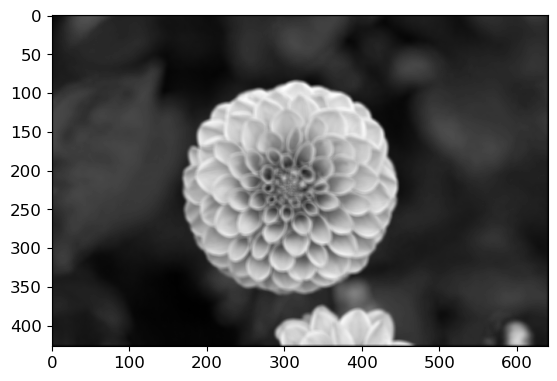

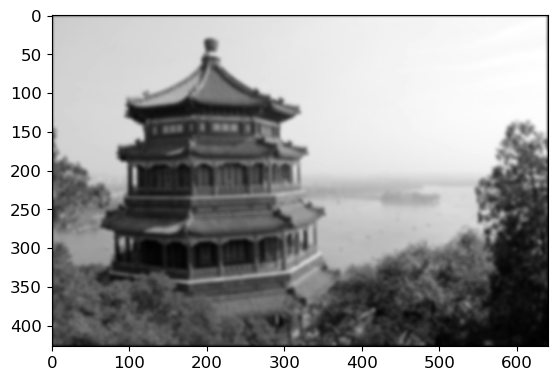

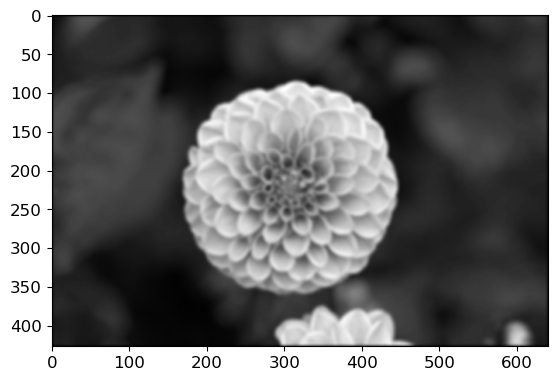

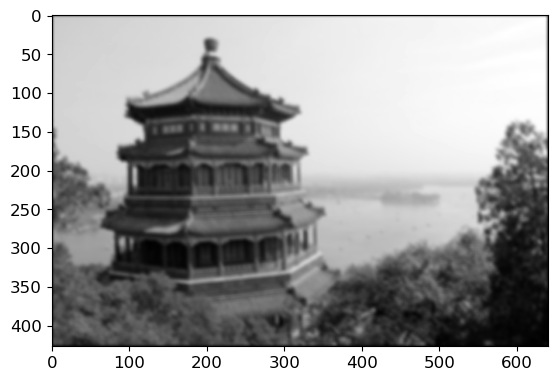

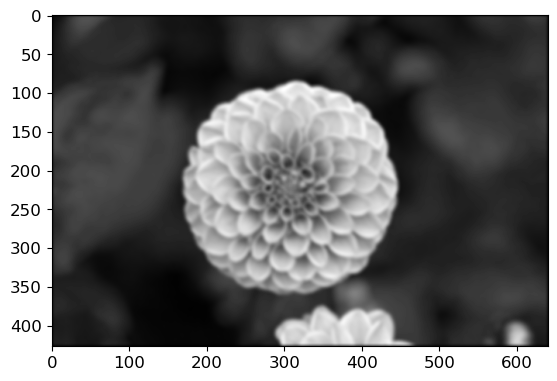

In [28]:
plt.imshow(china)
plt.show()
plt.imshow(flower)
plt.show()

# 1차 컨볼루션 2개의 필터 생성
filter10 = np.zeros(shape=(5, 5, channels, batch_size), dtype=np.float32)
filter11 = np.zeros(shape=(5, 5, channels, batch_size), dtype=np.float32) # 3=필터의 개수
# 필터의 선

for c in range(2):
    for i in range(5):
        for j in range(5):
            globals()[f'filter1{c}'][i, j, 0, 0] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 0, 1] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 1, 0] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 1, 1] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 2, 0] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 2, 1] = np.random.randint(10)
            
    outputs = tf.nn.conv2d(images, globals()[f'filter1{c}'], strides=1, padding="SAME")
    plt.imshow(outputs[0, :, :, 1], cmap="gray")
    plt.show()
    print("line---")
    plt.imshow(outputs[1, :, :, 1], cmap="gray")
    plt.show()
    # 필터의 개수에 따라서 아웃풋의 채널이 나온다.


# 2차 컨볼루션 2개의 필터 생성
channels2 = outputs.shape[3]
filter20 = np.zeros(shape=(5, 5, channels2, 2), dtype=np.float32)
filter21 = np.zeros(shape=(5, 5, channels2, 2), dtype=np.float32)

for c in range(2):
    for i in range(5):
        for j in range(5):
            globals()[f'filter2{c}'][i, j, 0, 0] = np.random.randint(10)
            globals()[f'filter2{c}'][i, j, 0, 1] = np.random.randint(10)
            globals()[f'filter2{c}'][i, j, 1, 0] = np.random.randint(10)
            globals()[f'filter2{c}'][i, j, 1, 1] = np.random.randint(10)
        
    outputs2 = tf.nn.conv2d(outputs, globals()[f'filter2{c}'], strides=1, padding="SAME")
    plt.imshow(outputs2[0, :, :, 1], cmap="gray")
    plt.show()
    plt.imshow(outputs2[1, :, :, 1], cmap="gray")
    plt.show()

In [24]:
outputs1

<tf.Tensor: shape=(2, 427, 640, 2), dtype=float64, numpy=
array([[[[105.50980392,  90.50588235],
         [147.15294118, 123.94117647],
         [177.7372549 , 153.01176471],
         ...,
         [221.8627451 , 193.94117647],
         [177.28235294, 159.34509804],
         [132.80784314, 111.92156863]],

        [[137.70588235, 131.10980392],
         [187.83921569, 175.03529412],
         [225.85882353, 215.22352941],
         ...,
         [280.65098039, 268.56470588],
         [225.08627451, 218.03137255],
         [164.68627451, 155.68627451]],

        [[161.0627451 , 162.58823529],
         [222.32941176, 214.05098039],
         [270.43921569, 265.97647059],
         ...,
         [335.98431373, 334.57254902],
         [269.47843137, 269.24313725],
         [198.16078431, 194.05882353]],

        ...,

        [[ 65.88627451,  73.8745098 ],
         [ 86.25098039,  90.1372549 ],
         [106.10588235, 111.21960784],
         ...,
         [ 20.23921569,  22.67058824],
        

In [11]:
outputs

<tf.Tensor: shape=(3, 427, 640, 3), dtype=float64, numpy=
array([[[[ 98.18039216,  99.11764706,   0.        ],
         [134.56470588, 128.92156863,   0.        ],
         [160.59607843, 159.06666667,   0.        ],
         ...,
         [203.64313725, 197.2       ,   0.        ],
         [173.98039216, 149.65098039,   0.        ],
         [127.58823529, 103.10196078,   0.        ]],

        [[126.69019608, 122.61176471,   0.        ],
         [174.41176471, 163.10196078,   0.        ],
         [201.7254902 , 204.99607843,   0.        ],
         ...,
         [257.38039216, 255.6745098 ,   0.        ],
         [216.81960784, 192.30980392,   0.        ],
         [159.4627451 , 137.84313725,   0.        ]],

        [[164.41960784, 149.01176471,   0.        ],
         [229.94509804, 197.10196078,   0.        ],
         [270.49803922, 252.3254902 ,   0.        ],
         ...,
         [341.68627451, 315.83529412,   0.        ],
         [280.29803922, 241.65882353,   0.      

In [24]:
outputs2

<tf.Tensor: shape=(2, 427, 640, 2), dtype=float64, numpy=
array([[[[14012.62745098, 12952.44313725],
         [17732.23529412, 19694.        ],
         [22649.34509804, 26912.16470588],
         ...,
         [28079.46666667, 36133.68627451],
         [21033.96862745, 30082.65490196],
         [13532.19607843, 22128.74117647]],

        [[19654.0745098 , 18971.96078431],
         [25552.67843137, 27801.76470588],
         [32705.26666667, 37601.82352941],
         ...,
         [40656.18431373, 49954.11764706],
         [30829.73333333, 40834.35294118],
         [20224.14117647, 29760.23921569]],

        [[26202.70588235, 23864.80784314],
         [34481.90196078, 34295.35686275],
         [44115.81568627, 45939.50588235],
         ...,
         [54836.1372549 , 60407.11764706],
         [41323.00784314, 49101.34117647],
         [27765.06666667, 35131.97647059]],

        ...,

        [[11383.01568627, 10183.71764706],
         [14975.8       , 13999.81176471],
         [18757.6705

In [5]:
filter10

array([[[[6., 3.],
         [7., 4.],
         [6., 9.]],

        [[2., 6.],
         [7., 4.],
         [3., 7.]],

        [[7., 2.],
         [5., 4.],
         [1., 7.]],

        [[5., 1.],
         [4., 0.],
         [9., 5.]],

        [[8., 0.],
         [9., 2.],
         [6., 3.]]],


       [[[8., 2.],
         [4., 2.],
         [6., 4.]],

        [[8., 6.],
         [1., 3.],
         [8., 1.]],

        [[9., 8.],
         [9., 4.],
         [1., 3.]],

        [[6., 7.],
         [2., 0.],
         [3., 1.]],

        [[7., 3.],
         [1., 5.],
         [5., 9.]]],


       [[[3., 5.],
         [1., 9.],
         [1., 9.]],

        [[3., 7.],
         [6., 8.],
         [7., 4.]],

        [[1., 4.],
         [7., 9.],
         [8., 8.]],

        [[0., 8.],
         [6., 8.],
         [7., 0.]],

        [[7., 7.],
         [2., 0.],
         [7., 2.]]],


       [[[2., 0.],
         [4., 9.],
         [6., 9.]],

        [[8., 6.],
         [8., 7.],
         [1.